# Histogram 

A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. We use cv.calcHist() to generate the histogram. Here are the parameter values:

In [14]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

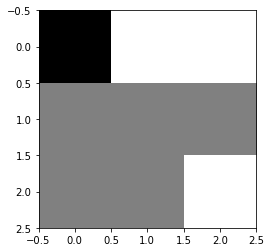

Toy_images: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [2]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap='gray')
plt.show()
print("Toy_images:",toy_image)

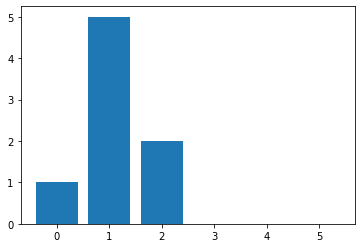

In [4]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

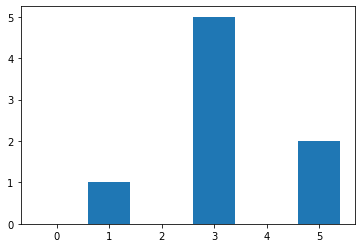

In [5]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()

The histogram is a function where  ℎ\[𝑟]  where  𝑟∈0,1,2 . In the above example  ℎ\[0]=1 , ℎ\[1]=5  and  ℎ\[2]=3

##  Gray Scale Histograms

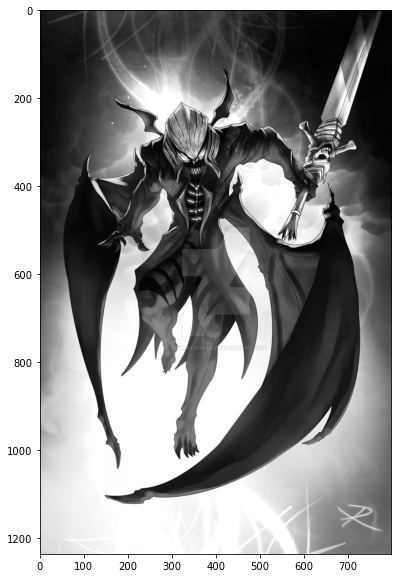

In [7]:
goldhill = cv2.imread("devil.jpg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap='gray')
plt.show()

In [8]:
hist = cv2.calcHist([goldhill],[0],None,[256],[0,256])

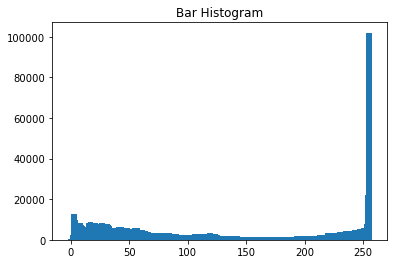

In [11]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values,hist[:,0],width=5)
plt.title("Bar Histogram")
plt.show()

The histogram is a function where  ℎ\[𝑟]  where  𝑟∈0,1,..,255 .

We can convert it to a probability mass function by normalizing it by the number of pixels:

In [12]:
PMF = hist/(goldhill.shape[0] * goldhill.shape[1])

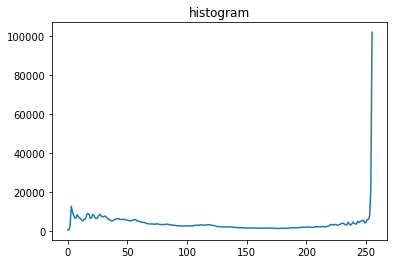

In [13]:
plt.plot(intensity_values,hist)
plt.title("histogram")
plt.show()

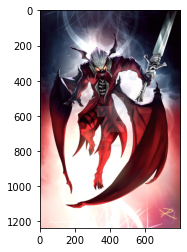

In [4]:
devil  = cv2.imread('devil.jpg')
plt.imshow(cv2.cvtColor(devil,cv2.COLOR_BGR2RGB))
plt.show()

n the loop, the value for i specifies what color channel calcHist is going to calculate the histogram for.

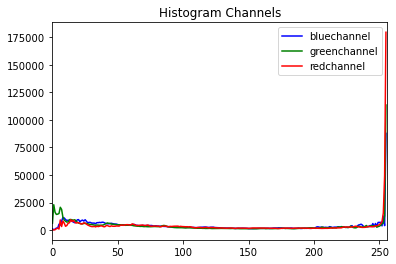

In [17]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([devil],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color=col,label=col+"channel")
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

# Intensity Transformations

It's helpful to think of an image as a function  𝑓(𝑥,𝑦)  instead of an array at this point, where x is the row index and y is the column index. You can apply a transformation  𝑇  to the image and get a new image:
𝑔(𝑥,𝑦)=𝑇(𝑓(𝑥,𝑦))
 
An Intensity Transformation depends on only one single point  (𝑥,𝑦) . For example, you can apply a linear transform  𝑔(𝑥,𝑦)=2𝑓(𝑥,𝑦)+1 ; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The variable if  𝑟  is the gray level intensity, similar to the histogram values. The new output s is given by:

𝑠=𝑇(𝑟)

## Image Negatives

In [19]:
neg_toy_image = -1 * toy_image + 255

print("toy image\n", neg_toy_image)
print("image negatives\n", neg_toy_image)

toy image
 [[255 253 253]
 [254 254 254]
 [254 254 253]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


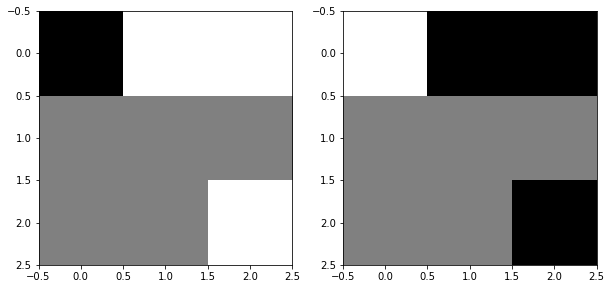

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [20]:
plt.figure(figsize =(10,10))
plt.subplot(1,2,1)
plt.imshow(toy_image,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(neg_toy_image,cmap='gray')
plt.show()
print("toy_image:",toy_image)

## Brightness and contrast adjustments

In [33]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [34]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

In [35]:
alpha = 1 # Simple contrast control
beta = 100   # Simple brightness control   
new_image = cv2.convertScaleAbs(devil, alpha=alpha, beta=beta)

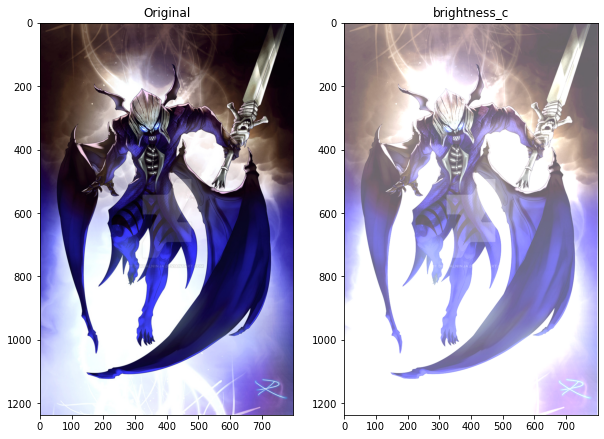

In [36]:

plot_image(devil,new_image, title_1 = "Original",title_2="brightness_c")

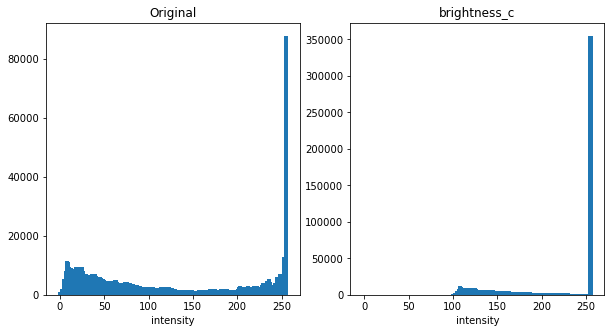

In [38]:
plt.figure(figsize=(10,5))
plot_hist(devil, new_image,"Original","brightness_c")

In [41]:
plt.figure(figsize=(10,5))
alpha = 2# Simple contrast control
beta = 0 # Simple brightness control   # Simple brightness control
new_image = cv2.convertScaleAbs(devil, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

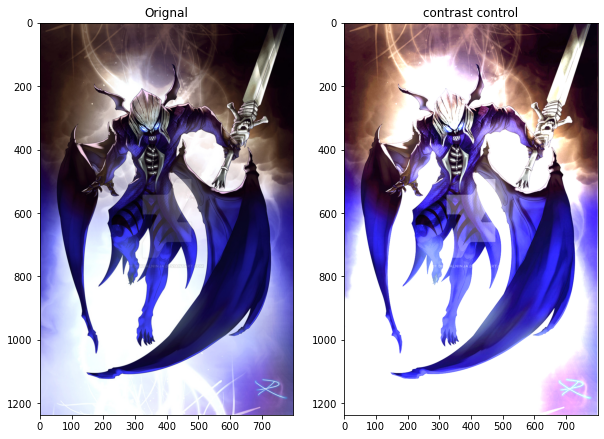

In [42]:
plot_image(devil,new_image,"Orignal","contrast control")

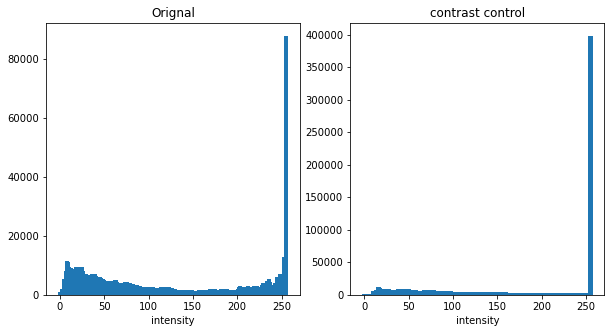

In [45]:
plt.figure(figsize=(10,5))
plot_hist(devil, new_image,"Orignal","contrast control")

In [47]:
plt.figure(figsize=(10,5))
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(devil, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

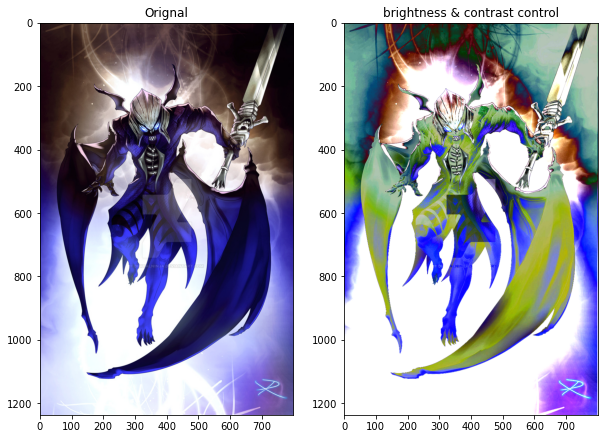

In [49]:
plot_image(devil, new_image, "Orignal", "brightness & contrast control")

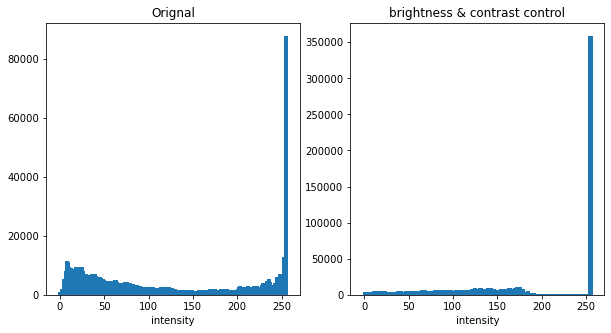

In [50]:
plt.figure(figsize=(10,5))
plot_hist(devil, new_image, "Orignal", "brightness & contrast control")

# Histogram Equalization

Histogram Equalization increases the contrast of images, by stretching out the range of the grayscale pixels; It does this by flatting the histogram. We simply apply the function cv2.equalizeHist.

In [81]:
honda = cv2.imread("honda.jpg",cv2.IMREAD_GRAYSCALE)
new_images = cv2.equalizeHist(honda)

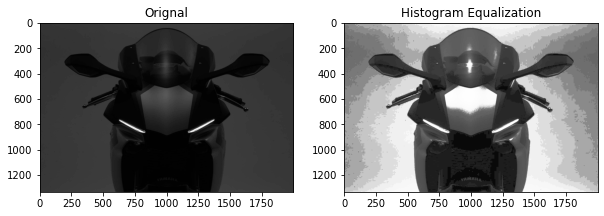

In [82]:
plot_image(honda,new_images,"Orignal","Histogram Equalization")

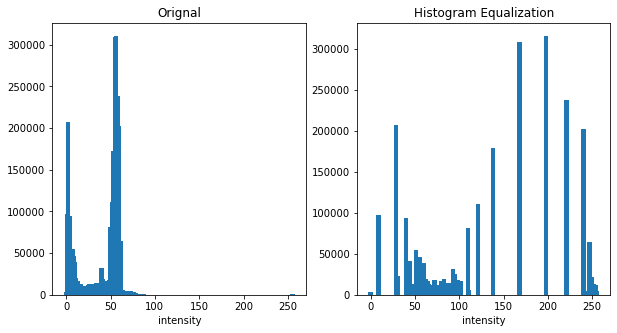

In [83]:
plt.figure(figsize=(10,5))
plot_hist(honda, new_images, "Orignal", "Histogram Equalization")

# Thresholding and Simple Segmentation

Thresholding is used in image segmentation this means extracting objects from an image. Image segmentation is used in many applications including extracting text, medical imaging, and industrial imaging. Thresholding an image takes a threshold; If a particular pixel (i,j) is greater than that threshold it will set that pixel to some value usually 1 or 255, otherwise, it will set it to another value, usually zero. We can write a Python function that will perform thresholding and output a new image given some input grayscale image:

In [63]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out    

In [64]:
toy_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

In [65]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

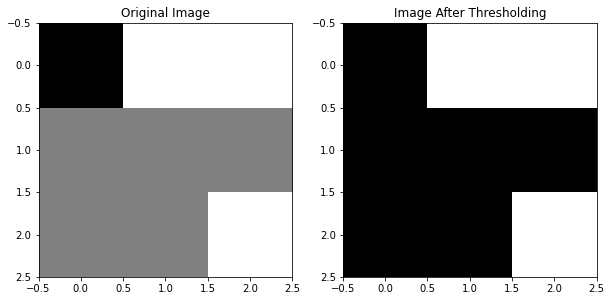

In [66]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

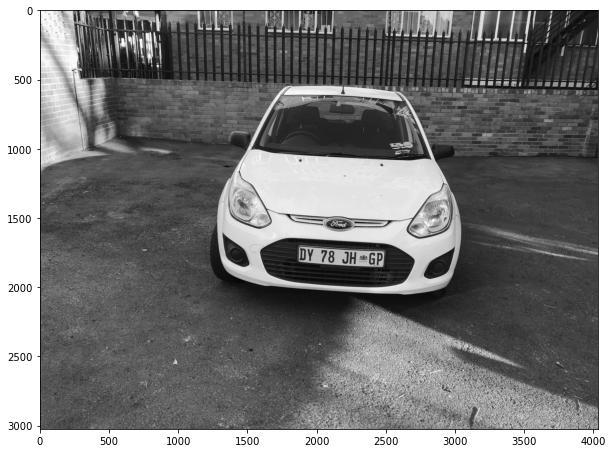

In [88]:
image = cv2.imread("v.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

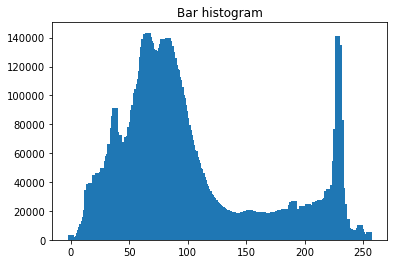

In [89]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

In [90]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
new_image

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

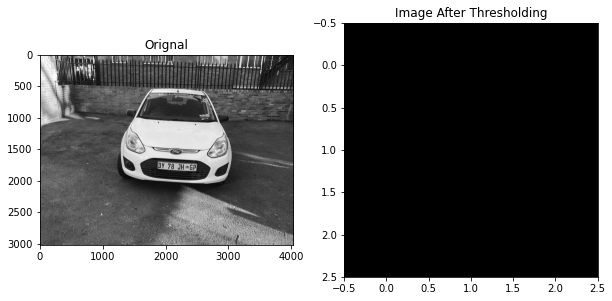

In [91]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

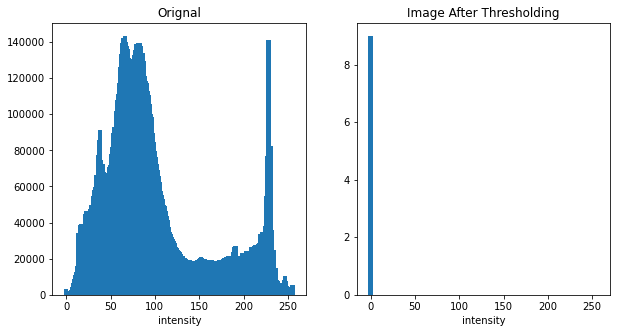

In [92]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

In [93]:
cv2.THRESH_BINARY

0

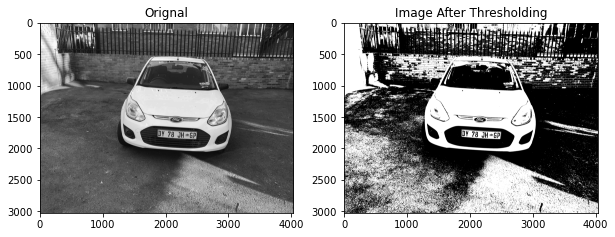

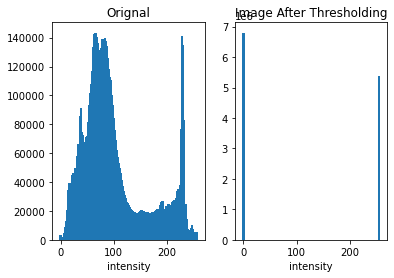

In [94]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

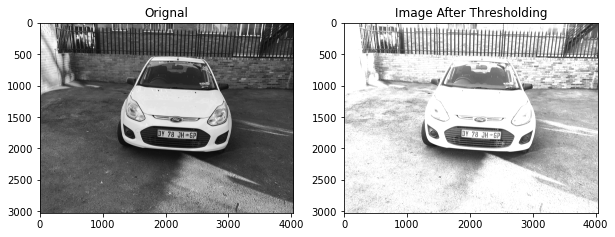

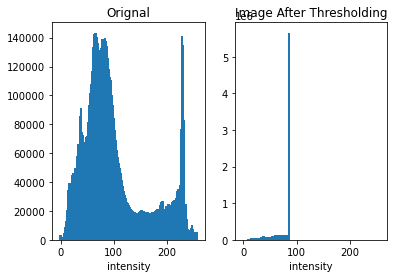

In [95]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

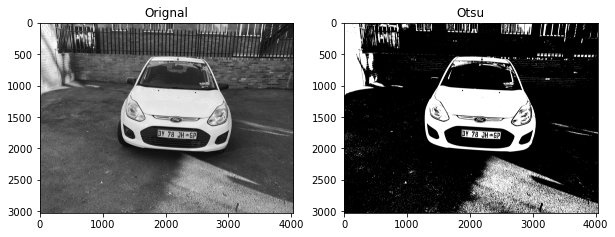

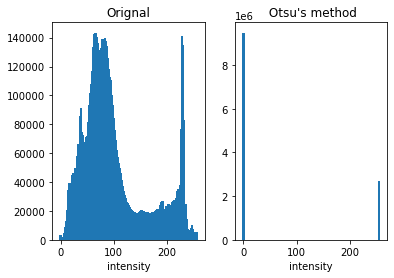

In [96]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")